# Well logs and tops 

4 Poseiden Wells

Check out more tips here,
https://github.com/agile-geoscience/recipes

https://github.com/agile-geoscience/recipes/blob/master/Handling%20formation%20tops.ipynb
    

In [83]:
from welly import Well, Project 
from striplog import Striplog, Legend
import matplotlib.pyplot as plt

In [84]:
p = Project.from_las('data/las/*.LAS') ###creates a welly project from all las in the directory

0it [00:00, ?it/s]C:\Users\MBelobraydic\anaconda3\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
4it [00:02,  1.71it/s]


In [120]:
p ###project information

Index,UWI,Data,Curves
0,Kronos 1,8 curves,"GR, RS, RD, NPHI, RHOB, DCAV, DT, DTS"
1,Poseidon 1,9 curves,"GR, ATRX, ATRT, NPHI, CAL1, HDAR, HROM, DTS, DT"
2,Poseidon 2,8 curves,"GR, RS, RD, DT, DTS, DCAV, RHOB, NPHI"
3,Torosa 1,8 curves,"GR, RS, RD, RHOB, NPHI, HDAR, DT, DTS"


In [121]:
#Datum values for this dataset are saved in commented out secction in the las headers
#this array helps by fixing the 
kb_arr = {'Kronos 1': 21.8, 'Poseidon 1': 26.4, 'Poseidon 2': 21.8, 'Torosa 1':22.9}

In [122]:
#Datum values for this dataset are saved in commented out secction in the header
for w in p:
    w.location.datum = kb_arr[w.uwi]
    #print(w.location)

In [123]:
print(p[-1].header)
print(p[-1].location)

{'name': 'Torosa 1', 'uwi': 'Torosa 1', 'field': 'Exploration', 'company': 'Woodside'}
Location({'td': None, 'crs': CRS({}), 'location': '', 'country': '', 'province': '', 'latitude': '-13/52/02.03', 'longitude': '122/04/09.59', 'datum': 22.9, 'deviation': None, 'position': None})


In [124]:
curve_legend_csv = """colour,lw,xscale,curve mnemonic
#000000,1.0,linear,GR
#0000FF,1.0,log,RS
#FF0000,1.0,log,RD
#FF0000,1.0,linear,RHOB
#0000FF,1.0,linear,NPHI
#0000FF,1.0,linear,DT
#FF00FF,1.0,linear,DTS
"""
curve_legend = Legend.from_csv(text=curve_legend_csv)

In [139]:
w = p[3]
print(w.uwi)

Torosa 1


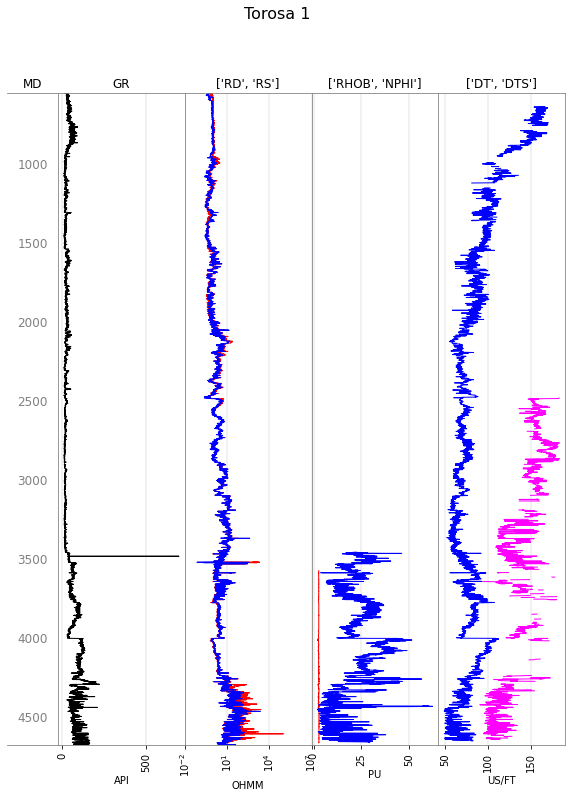

In [140]:
w.plot(tracks=['MD','GR',['RD','RS'],['RHOB','NPHI'],['DT','DTS']], legend=curve_legend)

In [141]:
print(w.uwi)
filename = 'data/tops/'+w.uwi+'.csv'
tops = Striplog.from_csv(filename)
for top in tops:
    print(top)

Torosa 1
{'top': Position({'middle': 476.3, 'units': 'm'}), 'base': Position({'middle': 476.3, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'formation': 'Sea Bed'})]}
{'top': Position({'middle': 476.3, 'units': 'm'}), 'base': Position({'middle': 955.8, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'formation': 'Barracouta Fm'})]}
{'top': Position({'middle': 955.8, 'units': 'm'}), 'base': Position({'middle': 2432.8, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'formation': 'Oliver Limestone Fm'})]}
{'top': Position({'middle': 2432.8, 'units': 'm'}), 'base': Position({'middle': 3459.4, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'formation': 'Prion Limestone Fm'})]}
{'top': Position({'middle': 3459.4, 'units': 'm'}), 'base': Position({'middle': 3778.8, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'formation': 'Johnson Fm'})]}
{'top': Position({'middl

In [142]:
w.data['tops'] = tops

In [143]:
w

Well(uwi: 'Torosa 1', 9 curves: ['GR', 'RS', 'RD', 'RHOB', 'NPHI', 'HDAR', 'DT', 'DTS', 'tops'])

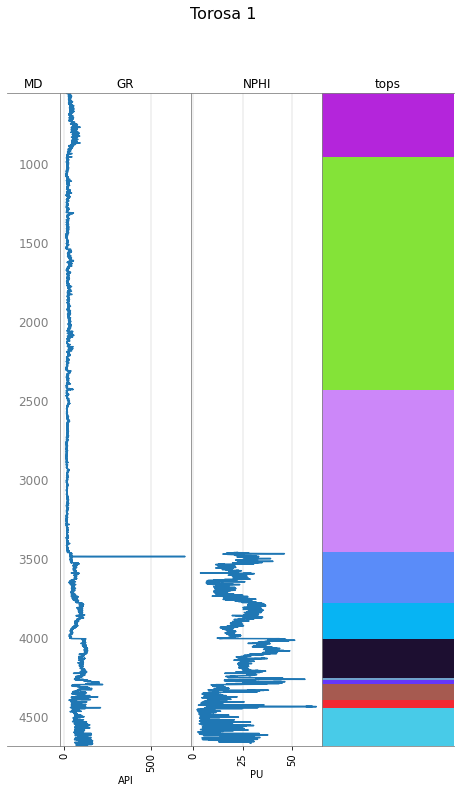

In [144]:
w.plot(tracks=['MD','GR','NPHI','tops'])

In [145]:
w.data['tops'][-2]

Interval({'top': Position({'middle': 4444.0, 'units': 'm'}), 'base': Position({'middle': 4685.0, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'formation': 'Traissic'})]})

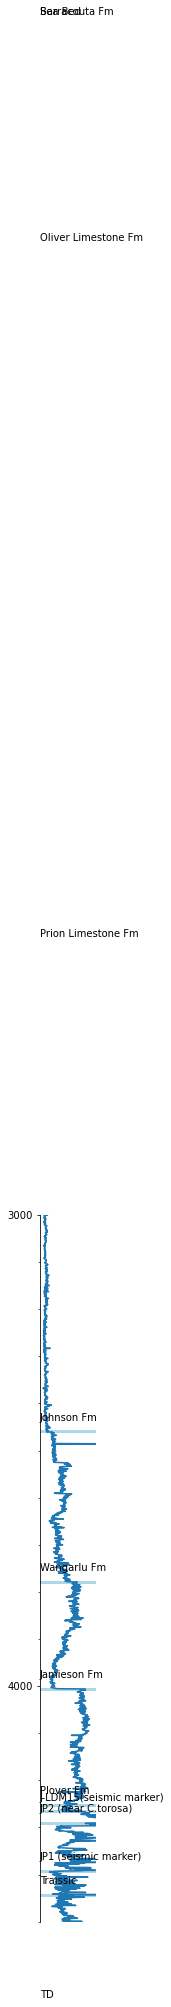

In [151]:
fig, ax = plt.subplots(1, figsize=(1,13))
ax.plot(w.data['GR'], w.data['GR'].basis)

tops.plot(ax=ax, field='formation', style='tops', aspect=3)

_ = ax.set_xlim(0,150)
_ = ax.set_ylim(4500, 3000)

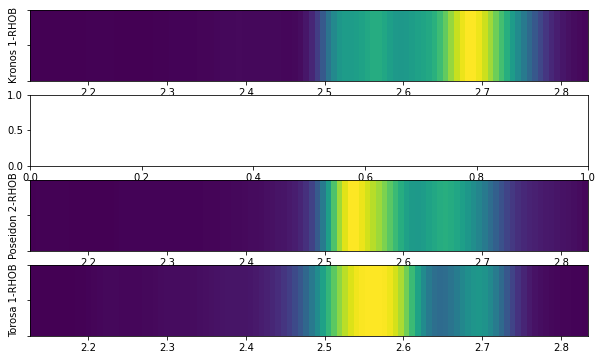

In [153]:
p.plot_kdes('RHOB')